In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
import numpy as np
from scipy.sparse.csgraph import shortest_path
from sklearn.neighbors import kneighbors_graph
from scipy.linalg import eig
from operator import itemgetter, attrgetter
from sklearn import manifold

In [6]:
iris = datasets.load_iris()
y = iris.target

In [36]:
def TriVP(Valp,Vectp):
    # trie dans l'ordre décroisant les valeurs propres
    # en cas de valeurs propres complexes on trie  selon leu module
    liste1 = Vectp.tolist()
    liste2 = Valp.tolist()
    norme = np.abs(Valp)
    liste3 = norme.tolist()

    result = zip(liste1, liste2,liste3)
    result_trie =sorted(result,key =itemgetter(2), reverse=True)
    liste1, liste2, liste3 =  zip(*result_trie)
    Vectp = np.asarray(liste1)
    Valp = np.asarray(liste2)
    
    return Valp,Vectp
def isomap(X):
    n_neighbors=70
    m=X.shape[0]
    kng = kneighbors_graph(X, n_neighbors,mode='distance')
    dist_matrix = shortest_path(kng,directed=True)
    I = np.eye(m)
    ones = np.ones(m)
    B=-0.5*(I-(1/m)*ones)@(dist_matrix**2)@(I-(1/m)*ones)
    Valp,Vectp = eig(B)
    Valp,Vectp = TriVP(Valp,Vectp)
    Y=Vectp[:,:2]@np.diag(np.sqrt(Valp[:2]))
    return Y


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


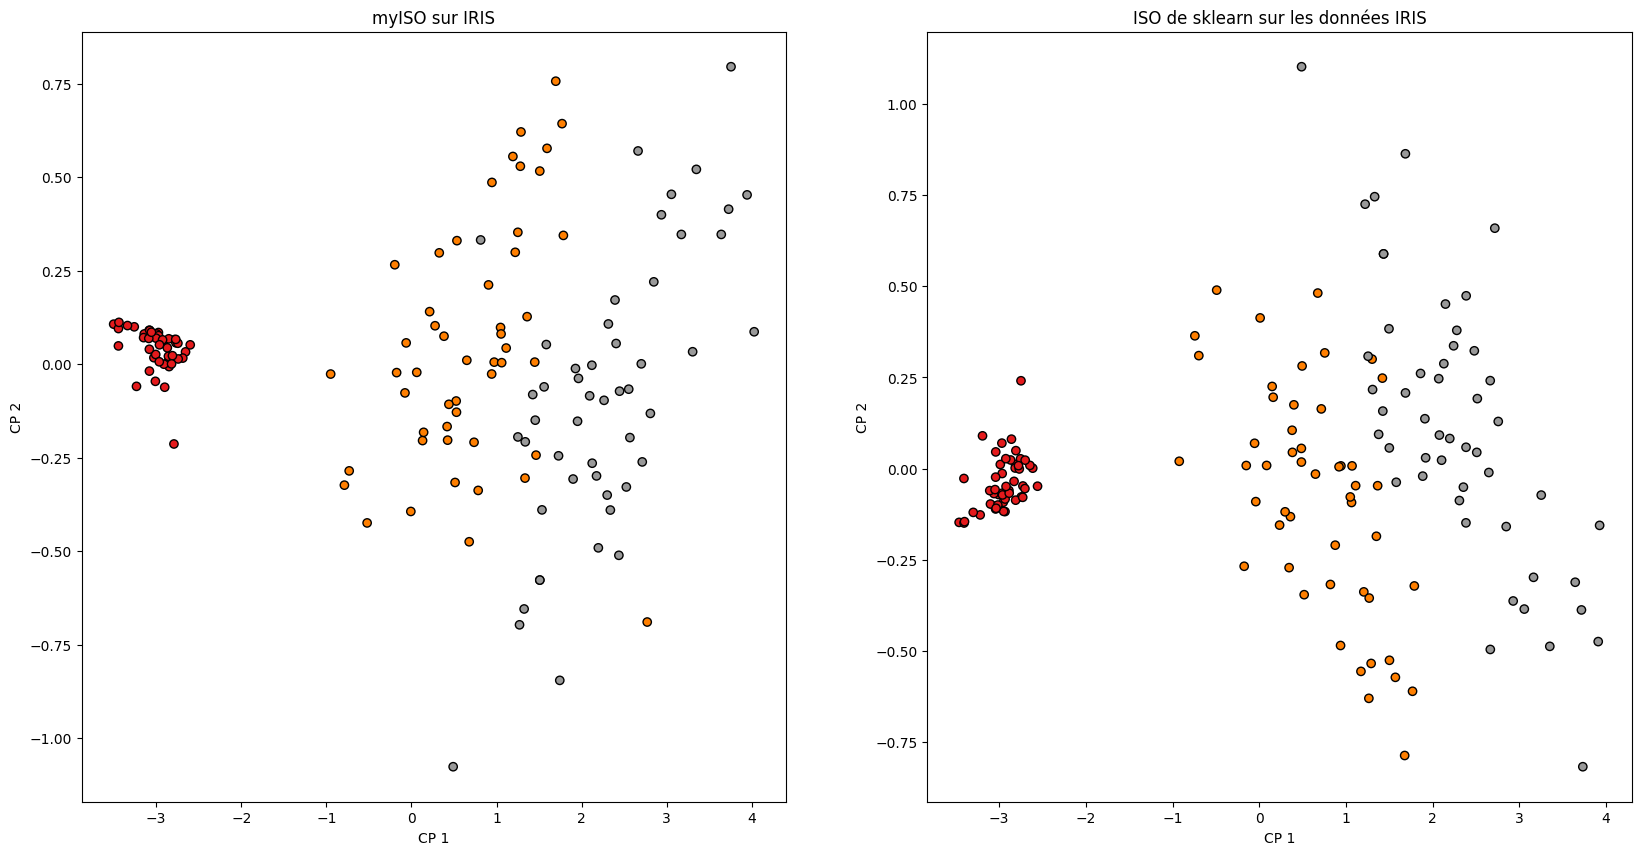

In [34]:
Y=isomap(iris.data)
plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO sur IRIS')
Y_sckit = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(iris.data)
plt.subplot(1, 2, 2)
plt.scatter(Y_sckit[:, 0], Y_sckit[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('ISO de sklearn sur les données IRIS')
plt.show()

In [37]:
mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


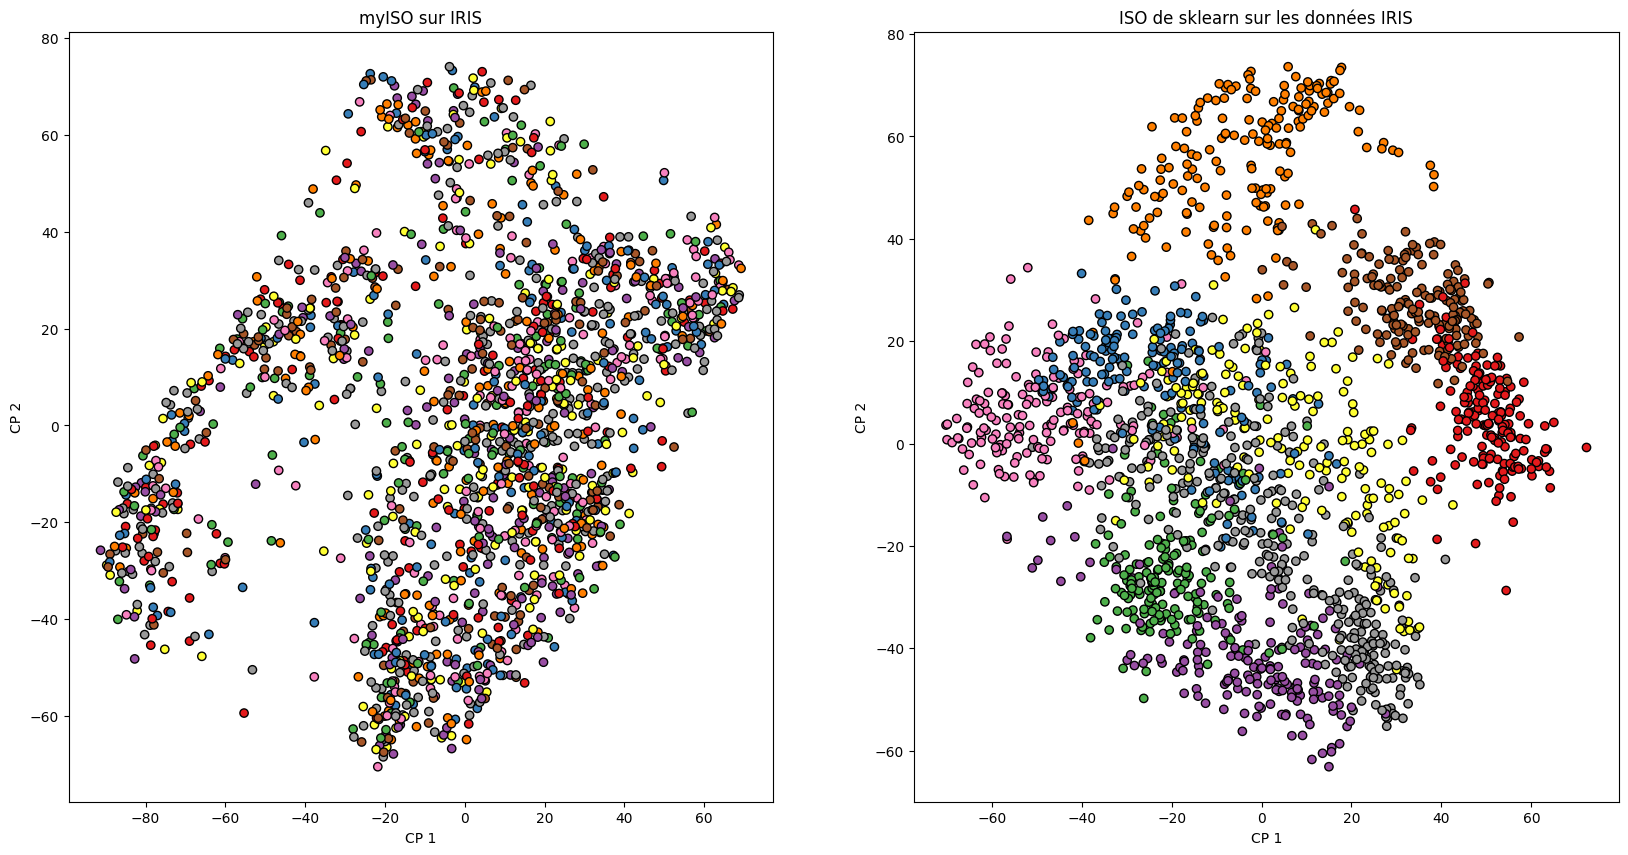

In [39]:
Y=isomap(X_mnist)
plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO sur IRIS')
Y_sckit = manifold.Isomap(n_neighbors=70, n_components=2).fit_transform(X_mnist)
plt.subplot(1, 2, 2)
plt.scatter(Y_sckit[:, 0], Y_sckit[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('ISO de sklearn sur les données IRIS')
plt.show()

In [15]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [18]:
mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target

In [21]:
y_mnist

array([0, 1, 2, ..., 8, 9, 8])